In [195]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns



dir_data = 'data'
dir_output = 'output'

df = pd.read_csv(os.path.join(dir_data, 'herodata.csv'))
df = df.loc[df['role'] != 'Support']
df = df.drop(['speed', 'sight', 'life_scale', 'life_regenScale', 'weapon_damageScale'], axis=1)

# keep most important features
# df = df[['hero', 'role', 'rating_damage', 'life_regenRate', 'life_amount']]
# df = df[['hero', 'role', 'rating_damage', 'life_regenRate', 'life_amount', 'weapon_range']]


In [196]:

X = df.drop(['hero', 'role'], axis=1)
y = df[['role']]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


clf = RandomForestClassifier(n_estimators=500, max_depth=5)
clf.fit(X_train, y_train)


# Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# print results of predict
print('Actual - Prediction')
for yt, yp in zip(y_test.to_numpy(), y_pred):
    print(yt[0], '-', yp)

prediction_proba = clf.predict_proba(X_test)
print(prediction_proba)


C:\Users\bxjxr\AppData\Local\Temp/ipykernel_11996/110422097.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy: 0.6923076923076923
Actual - Prediction
Bruiser - Bruiser
Ranged Assasin - Healer
Melee Assasin - Bruiser
Bruiser - Bruiser
Tank - Tank
Bruiser - Tank
Ranged Assasin - Ranged Assasin
Tank - Tank
Bruiser - Bruiser
Ranged Assasin - Ranged Assasin
Ranged Assasin - Ranged Assasin
Bruiser - Tank
Healer - Healer
Melee Assasin - Ranged Assasin
Ranged Assasin - Tank
Tank - Tank
Healer - Healer
Healer - Healer
Bruiser - Melee Assasin
Tank - Tank
Ranged Assasin - Ranged Assasin
Ranged Assasin - Ranged Assasin
Ranged Assasin - Ranged Assasin
Ranged Assasin - Ranged Assasin
Healer - Bruiser
Healer - Healer
[[5.57398056e-01 2.85547203e-02 2.73373568e-02 5.79960317e-03
  3.80910264e-01]
 [3.90649573e-02 4.92534360e-01 4.96008842e-02 4.12345758e-01
  6.45404040e-03]
 [3.84349833e-01 5.30681818e-03 1.64912698e-01 3.35644589e-01
  1.09786061e-01]
 [6.21380035e-01 1.76870574e-02 1.73394666e-01 4.67411477e-02
  1.40797094e-01]
 [4.06978534e-01 3.28311761e-03 3.80358555e-02 1.93920458e-02
  5.323

No handles with labels found to put in legend.


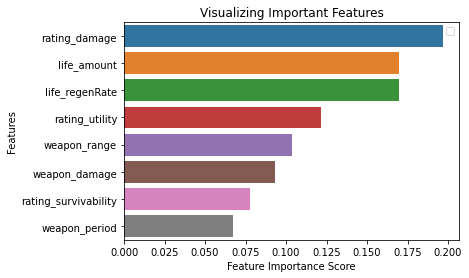

In [197]:
# Evaluate Feature importance
feature_imp = pd.Series(clf.feature_importances_, index=df.columns[2:]).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [198]:
# save model to disk
pickle.dump(clf, open('rf_model.sav', 'wb'))